In [ ]:
## import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression   
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from scipy.stats import *
from matplotlib import font_manager

import seaborn as sns
import statsmodels.api as sm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df_for1=pd.read_csv("용산구 외국인 일별 대여건수(전체).csv", encoding='ANSI')

In [4]:
df_for1.head()

,일시,대여소,대여건수,반납건수
0,2022-01-01,839,1,0
1,2022-01-01,853,0,1
2,2022-01-01,860,0,1
3,2022-01-01,870,1,0
4,2022-01-01,4619,1,1


In [5]:
df_for1['일시'] = pd.to_datetime(df_for1['일시'])  #대여일시 datatime 변환

In [6]:
df_for1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4274 entries, 0 to 4273
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일시      4274 non-null   datetime64[ns]
 1   대여소     4274 non-null   int64         
 2   대여건수    4274 non-null   int64         
 3   반납건수    4274 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 133.7 KB


In [7]:
df_for1['month'] = df_for1['일시'].dt.month #월 추출

In [8]:
df_for1

,일시,대여소,대여건수,반납건수,month
0,2022-01-01,839,1,0,1
1,2022-01-01,853,0,1,1
2,2022-01-01,860,0,1,1
3,2022-01-01,870,1,0,1
4,2022-01-01,4619,1,1,1
...,...,...,...,...,...
4269,2022-12-30,4615,4,1,12
4270,2022-12-30,4639,3,3,12
4271,2022-12-31,850,1,0,12
4272,2022-12-31,857,0,3,12


In [9]:
df_for1.isnull().sum() #결측치 확인
#결측치는 없으나 NaN값이 있다

일시       0
대여소      0
대여건수     0
반납건수     0
month    0
dtype: int64

In [10]:
df_for1

,일시,대여소,대여건수,반납건수,month
0,2022-01-01,839,1,0,1
1,2022-01-01,853,0,1,1
2,2022-01-01,860,0,1,1
3,2022-01-01,870,1,0,1
4,2022-01-01,4619,1,1,1
...,...,...,...,...,...
4269,2022-12-30,4615,4,1,12
4270,2022-12-30,4639,3,3,12
4271,2022-12-31,850,1,0,12
4272,2022-12-31,857,0,3,12


In [11]:
df_for1_del = df_for1.dropna() #NaN값 없애기

In [12]:
df_for1_del

,일시,대여소,대여건수,반납건수,month
0,2022-01-01,839,1,0,1
1,2022-01-01,853,0,1,1
2,2022-01-01,860,0,1,1
3,2022-01-01,870,1,0,1
4,2022-01-01,4619,1,1,1
...,...,...,...,...,...
4269,2022-12-30,4615,4,1,12
4270,2022-12-30,4639,3,3,12
4271,2022-12-31,850,1,0,12
4272,2022-12-31,857,0,3,12


지금 변수가 날짜/월/대여소별로 모두 나뉘어져 있음

따라서 날짜는 월로 묶어 버리고, 대여소별로 나눠서 어느 대여소가 가장 빈번한지, 어느 달이 제일 많이 사용되는지를 파악

In [13]:
df_for1_del['대여소'].duplicated() #중복된 값 확인

0       False
1       False
2       False
3       False
4       False
        ...  
4269     True
4270     True
4271     True
4272     True
4273     True
Name: 대여소, Length: 4274, dtype: bool

In [14]:
grouped1 = df_for1_del.groupby(['month','대여소'])['대여건수'].sum()
# grouped1에서 0 값을 가지는 행을 필터링하여 제거
grouped1_filtered = grouped1[grouped1 != 0]
grouped1_filtered

month  대여소 
1      803     1
       807     3
       810     6
       812     1
       819     2
              ..
12     4621    1
       4629    1
       4634    1
       4638    1
       4639    3
Name: 대여건수, Length: 718, dtype: int64

In [15]:
# 대여건수 값이 높은 순서대로 정렬하여 상위 10개 데이터 추출
top_10_grouped1 = grouped1_filtered.groupby('month').apply(lambda x: x.nlargest(10))

top_10_grouped1

month  month  대여소 
1      1      860     8
              810     6
              825     5
              839     5
              807     3
                     ..
12     12     825     3
              835     3
              853     3
              4608    3
              4639    3
Name: 대여건수, Length: 120, dtype: int64

In [16]:
top_rental_stations_df = top_10_grouped1.reset_index(level=1, drop=True).reset_index()
top_rental_stations_df = top_rental_stations_df.rename(columns={'index': 'month'})
top_rental_stations_df = top_rental_stations_df[['month', '대여건수', '대여소']]
print(top_rental_stations_df)
#DF로 만들기

     month  대여건수   대여소
0        1     8   860
1        1     6   810
2        1     5   825
3        1     5   839
4        1     3   807
..     ...   ...   ...
115     12     3   825
116     12     3   835
117     12     3   853
118     12     3  4608
119     12     3  4639

[120 rows x 3 columns]


In [17]:
top_rental_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   month   120 non-null    int64
 1   대여건수    120 non-null    int64
 2   대여소     120 non-null    int64
dtypes: int64(3)
memory usage: 2.9 KB


In [18]:
# '대여소'에서 가장 많이 중복되는 숫자 top 10
top_rental_station_numbers = top_rental_stations_df['대여소'].value_counts().head(10).index.tolist()
print(top_rental_station_numbers)


[825, 870, 837, 853, 829, 810, 4634, 860, 4619, 846]


In [19]:
# 대여소에서 특정 번호에 해당하는 값을 추출
target_station_numbers = [825, 870, 837, 853, 829, 810, 4634, 860, 4619, 846]
target_station_data = top_rental_stations_df[top_rental_stations_df['대여소'].isin(target_station_numbers)]

print(target_station_data)


     month  대여건수   대여소
0        1     8   860
1        1     6   810
2        1     5   825
5        1     3   846
7        1     2   837
..     ...   ...   ...
110     12     5   837
113     12     4   870
114     12     4  4619
115     12     3   825
117     12     3   853

[69 rows x 3 columns]


In [20]:
# 대여소에서 특정 번호에 해당하는 값을 추출
target_station_numbers = [825, 870, 837, 853, 829, 810, 4634, 860, 4619, 846]
target_station_data = top_rental_stations_df[top_rental_stations_df['대여소'].isin(target_station_numbers)]

# 대여소별로 합계 계산
station_sum = target_station_data.groupby('대여소')['대여건수'].sum().reset_index()

print(station_sum)


    대여소  대여건수
0   810    88
1   825   363
2   829   121
3   837   153
4   846    63
5   853   150
6   860    98
7   870   239
8  4619    88
9  4634    79


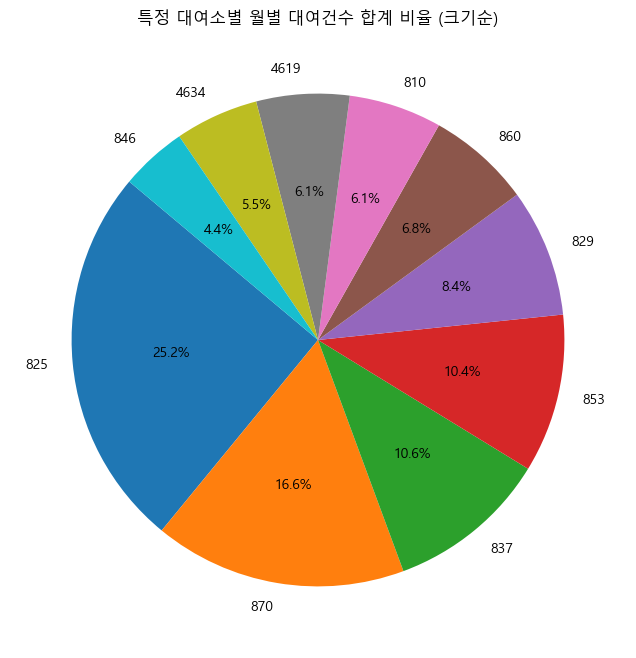

In [21]:
import matplotlib.pyplot as plt


font_fname = 'C:\Windows\Fonts\malgunbd.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

# 대여소에서 특정 번호에 해당하는 값을 추출
target_station_numbers = [825, 870, 837, 853, 829, 810, 4634, 860, 4619, 846]
target_station_data = top_rental_stations_df[top_rental_stations_df['대여소'].isin(target_station_numbers)]

# 대여소별로 합계 계산 및 크기순 정렬
station_sum = target_station_data.groupby('대여소')['대여건수'].sum().reset_index()
station_sum = station_sum.sort_values(by='대여건수', ascending=False)

# 원 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(station_sum['대여건수'], labels=station_sum['대여소'], autopct='%1.1f%%', startangle=140)
plt.title("특정 대여소별 월별 대여건수 합계 비율 (크기순)")
plt.show()


용산구에서 가장 외국인 대여량이 많은 대여소 top 4는 825, 870, 837, 853
-> 여기 대여소에 단말기 설치하는 것이 낫다고 생각

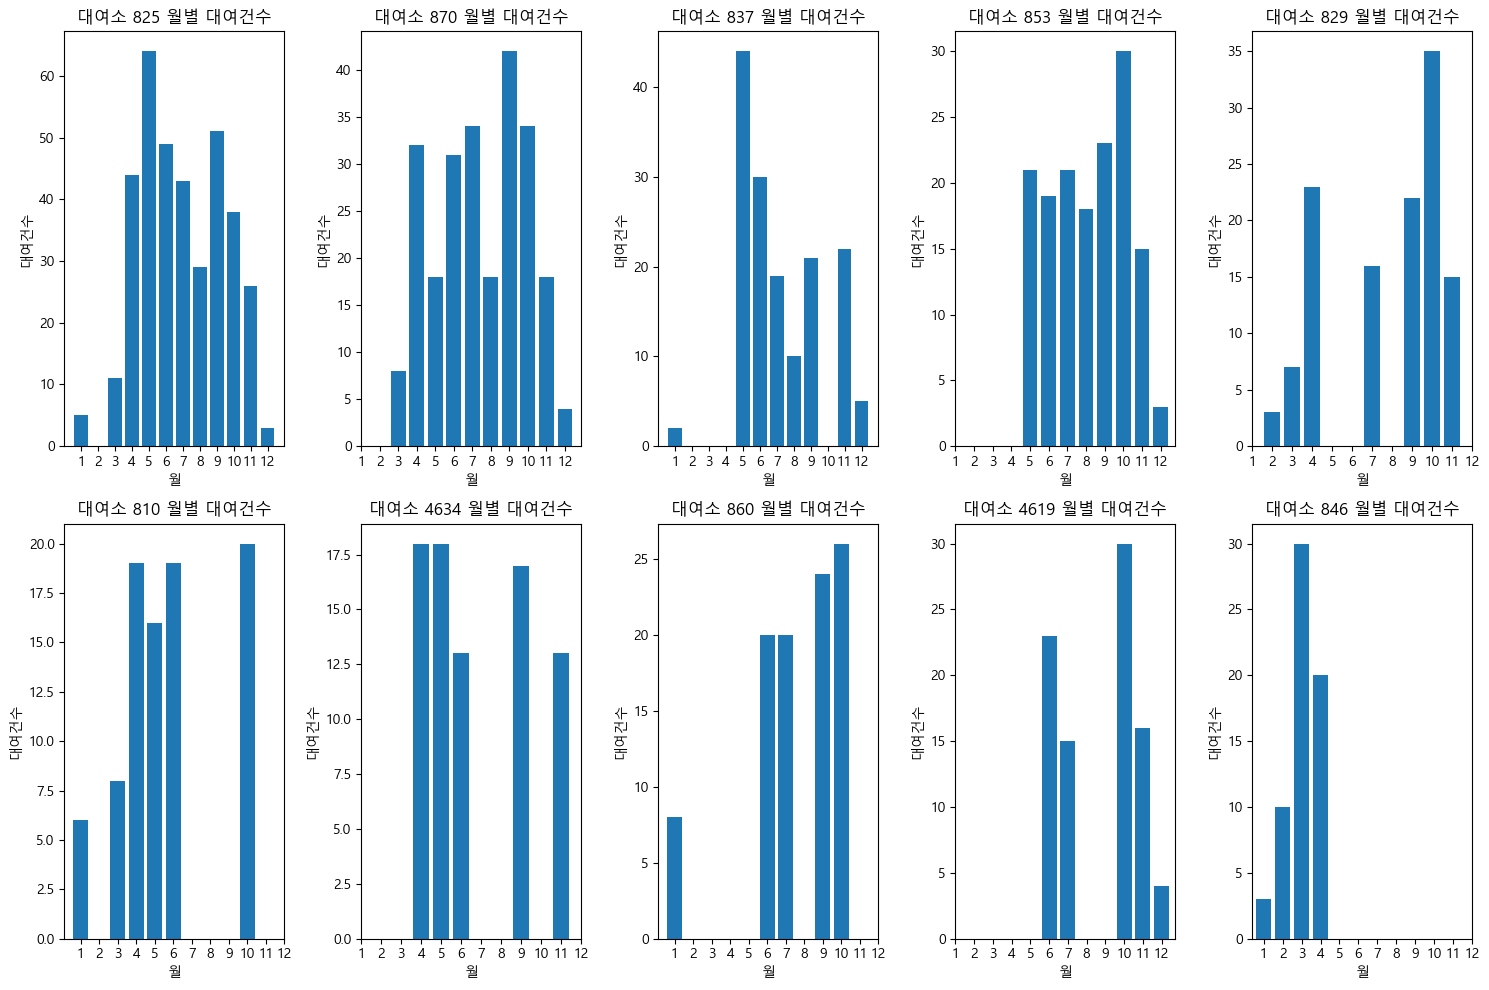

In [23]:
import matplotlib.pyplot as plt


font_fname = 'C:\Windows\Fonts\malgunbd.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

# 대여소 숫자 리스트
target_station_numbers = [825, 870, 837, 853, 829, 810, 4634, 860, 4619, 846]

# 대여소 숫자별로 subplot 생성하면서 막대 그래프 그리기
plt.figure(figsize=(15, 10))
for i, station_number in enumerate(target_station_numbers, 1):
    plt.subplot(2, 5, i)
    station_data = top_rental_stations_df[top_rental_stations_df['대여소'] == station_number]
    plt.bar(station_data['month'], station_data['대여건수'])
    plt.title(f'대여소 {station_number} 월별 대여건수')
    plt.xlabel('월')
    plt.ylabel('대여건수')
    plt.xticks(range(1, 13))  # x축 범위를 1부터 12까지로 제한

plt.tight_layout()
plt.show()


대여소별로 어느 달이 가장 많이 사용되는지를 파악/
846은 용산중학교이나 4월부터 없는 걸로 봐서는 없어진 것으로 추정/
853은 용산역 맞은편으로 5월부터 생긴 것으로 추정

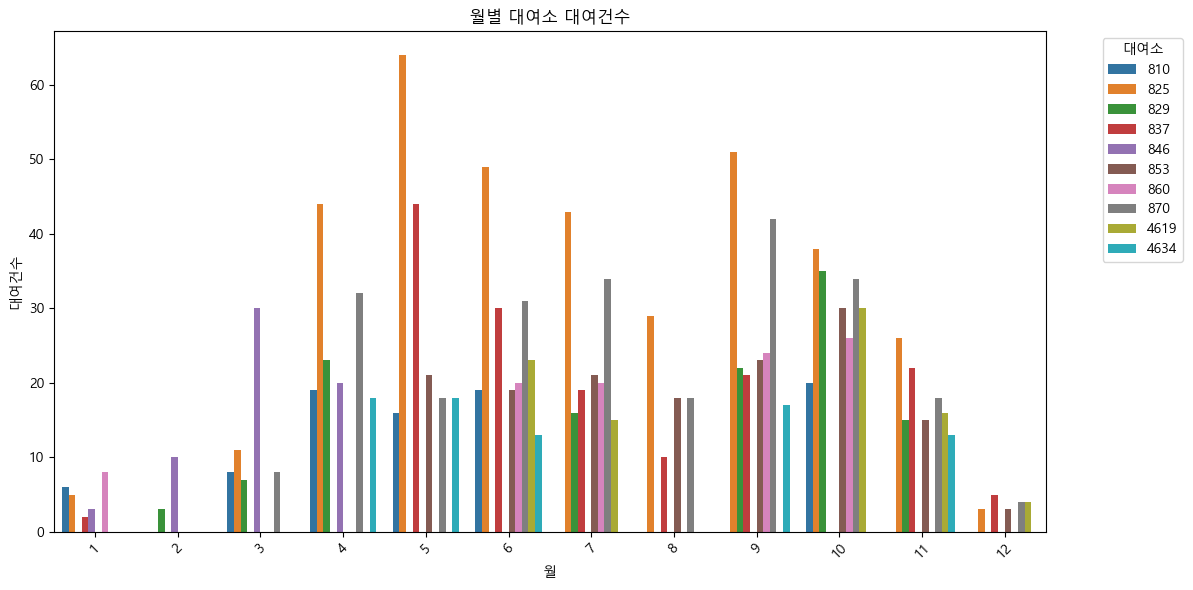

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


font_fname = 'C:\Windows\Fonts\malgunbd.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

# 대여소 숫자 리스트
target_station_numbers = [825, 870, 837, 853, 829, 810, 4634, 860, 4619, 846]

# 대여소 숫자별 데이터 추출
station_data = top_rental_stations_df[top_rental_stations_df['대여소'].isin(target_station_numbers)]

# 색상 설정을 위한 팔레트 생성
palette = sns.color_palette("tab10", n_colors=len(target_station_numbers))

# 바 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=station_data, x='month', y='대여건수', hue='대여소', palette=palette)
plt.title('월별 대여소 대여건수')
plt.xlabel('월')
plt.ylabel('대여건수')
plt.legend(title='대여소', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


외국인이 자전거를 가장 많이 타는 달: 5월

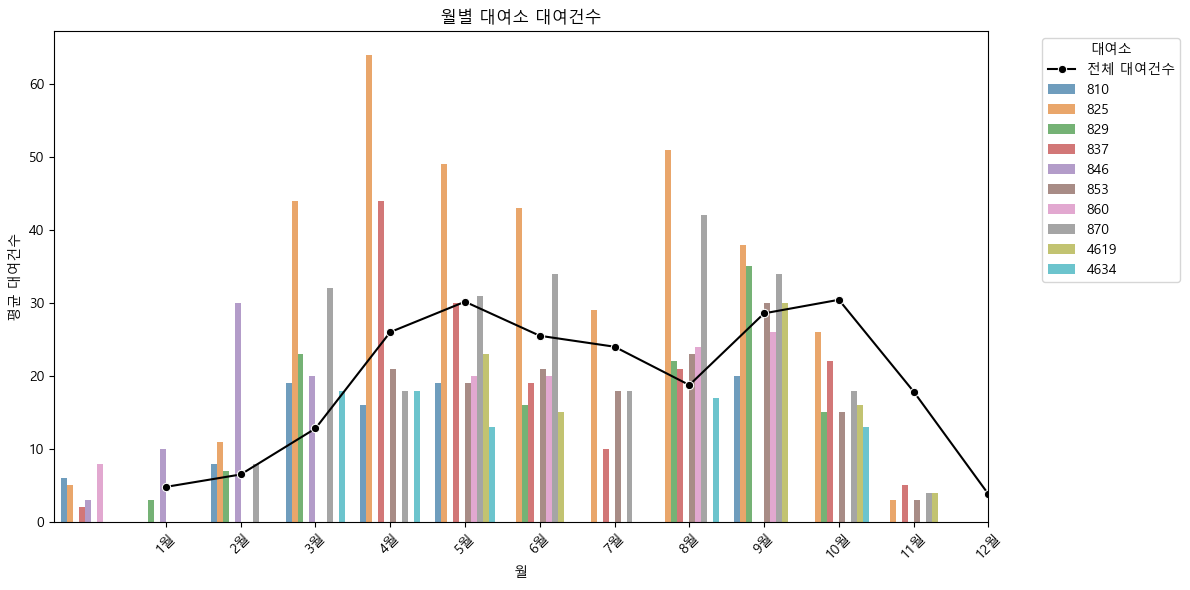

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


font_fname = 'C:\Windows\Fonts\malgunbd.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

# 대여소 숫자 리스트
target_station_numbers = [825, 870, 837, 853, 829, 810, 4634, 860, 4619, 846]

# 대여소 숫자별 데이터 추출
station_data = top_rental_stations_df[top_rental_stations_df['대여소'].isin(target_station_numbers)]

# 월별 대여건수의 평균 계산
monthly_mean = station_data.groupby('month')['대여건수'].mean().reset_index()

# 월별 대여건수의 평균 데이터를 월 순서에 맞게 재정렬
monthly_mean = monthly_mean.sort_values(by='month')

# 색상 설정을 위한 팔레트 생성
palette = sns.color_palette("tab10", n_colors=len(target_station_numbers))

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 꺾은 선 그래프
sns.lineplot(data=monthly_mean, x='month', y='대여건수', marker='o', color='black', label='전체 대여건수')

# 바 그래프
sns.barplot(data=station_data, x='month', y='대여건수', hue='대여소', palette=palette, alpha=0.7)

# x축 설정
x_ticks = range(1, 13)
x_labels = [f'{i}월' for i in x_ticks]
plt.xticks(x_ticks, x_labels, rotation=45)

plt.title('월별 대여소 대여건수')
plt.xlabel('월')
plt.ylabel('평균 대여건수')
plt.legend(title='대여소', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


위 그래프가 x축을 맞춰 도식화해도 막대그래프와 꺾은선그래프가 월별로 맞지 않음

그래도 3월-5월(봄), 9-10월(가을)까지 사용량이 많음

월별로 주말과 주중 합산 개수 나타낸 그래프 (상위 10개 대여소)

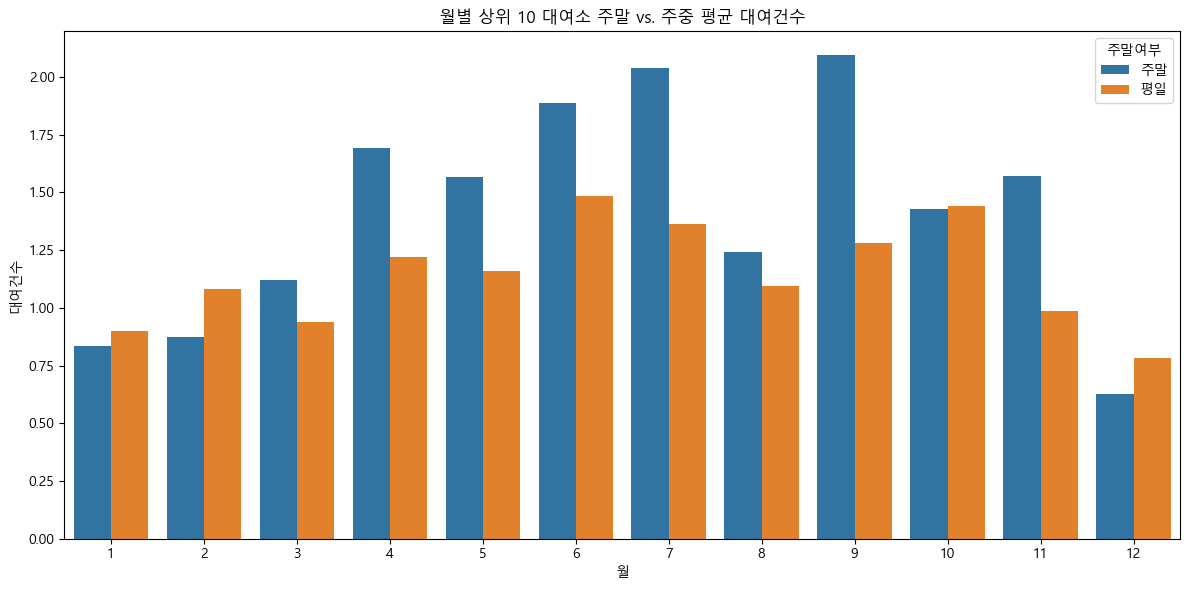

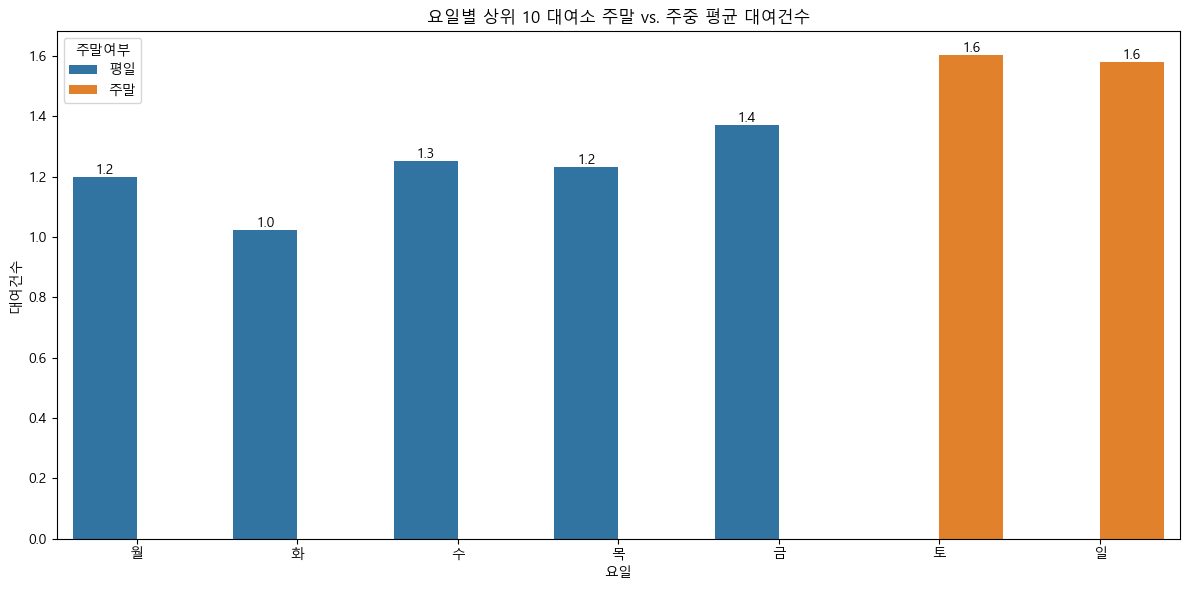

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# '일시', '대여소', '대여건수' 열을 가진 df_for1_del 데이터프레임을 가정합니다.
# (이전에 이미 df_for1_del에 위 열들을 추가했다고 가정합니다.)

# '일시' 열을 월로 변환하여 '월' 열을 추가합니다.
df_for1_del['월'] = df_for1_del['일시'].dt.month

# '일시' 열에서 요일 정보를 추출하여 '요일' 열을 추가합니다. (0: 월요일, 6: 일요일)
df_for1_del['요일'] = df_for1_del['일시'].dt.weekday

# 주말 여부를 나타내는 '주말여부' 열을 추가합니다. (5: 토요일, 6: 일요일)
df_for1_del['주말여부'] = df_for1_del['요일'].apply(lambda x: '주말' if x >= 5 else '평일')

# 상위 10개 대여소를 필터링합니다.
top_10_stations = [825, 870, 837, 853, 829, 810, 4634, 860, 4619, 846]
top_10_data = df_for1_del[df_for1_del['대여소'].isin(top_10_stations)]

# 월별로 주말과 주중의 평균 대여건수를 계산합니다.
monthly_avg_weekend_vs_weekday = top_10_data.groupby(['월', '주말여부'])['대여건수'].mean().reset_index()

# 색상 팔레트를 생성합니다.
palette = sns.color_palette("tab10", n_colors=2)

# 그래프 영역을 설정합니다.
plt.figure(figsize=(12, 6))

# 막대 그래프를 그립니다.
sns.barplot(data=monthly_avg_weekend_vs_weekday, x='월', y='대여건수', hue='주말여부', palette=palette)

# 제목과 범례를 추가합니다.
plt.title('월별 상위 10 대여소 주말 vs. 주중 평균 대여건수')
plt.legend(title='주말여부')

# 그래프를 표시합니다.
plt.tight_layout()
plt.show()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# '일시', '대여소', '대여건수' 열을 가진 df_for1_del 데이터프레임을 가정합니다.
# (이전에 이미 df_for1_del에 위 열들을 추가했다고 가정합니다.)

# '일시' 열을 월로 변환하여 '월' 열을 추가합니다.
df_for1_del['월'] = df_for1_del['일시'].dt.month

# '일시' 열에서 요일 정보를 추출하여 '요일' 열을 추가합니다. (0: 월요일, 6: 일요일)
df_for1_del['요일'] = df_for1_del['일시'].dt.weekday

# 주말 여부를 나타내는 '주말여부' 열을 추가합니다. (5: 토요일, 6: 일요일)
df_for1_del['주말여부'] = df_for1_del['요일'].apply(lambda x: '주말' if x >= 5 else '평일')

# 상위 10개 대여소를 필터링합니다.
top_10_stations = [825, 870, 837, 853, 829, 810, 4634, 860, 4619, 846]
top_10_data = df_for1_del[df_for1_del['대여소'].isin(top_10_stations)]

# 요일 순서를 정의합니다.
day_order = ['월', '화', '수', '목', '금', '토', '일']

# 요일별로 상위 10 대여소 주말과 주중 평균 대여건수를 계산합니다.
weekday_avg_weekend_vs_weekday = top_10_data.groupby(['요일', '주말여부'])['대여건수'].mean().reset_index()

# 색상 팔레트를 생성합니다.
palette = sns.color_palette("tab10", n_colors=2)

# 그래프 영역을 설정합니다.
plt.figure(figsize=(12, 6))

# 막대 그래프를 그립니다.
ax = sns.barplot(data=weekday_avg_weekend_vs_weekday, x='요일', y='대여건수', hue='주말여부', palette=palette)

# 숫자를 추가합니다.
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# 요일 이름 설정
plt.xticks(range(7), day_order)

# 제목과 범례를 추가합니다.
plt.title('요일별 상위 10 대여소 주말 vs. 주중 평균 대여건수')
plt.legend(title='주말여부')

# 그래프를 표시합니다.
plt.tight_layout()
plt.show()

